In [1]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1,2],[-0.5,6],[0,10],[1,18]]

import pandas as pd
pd.DataFrame(data)

scaler = MinMaxScaler()
scaler = scaler.fit(data)
result = scaler.transform(data)
result

result_ = scaler.fit_transform(data)
scaler.inverse_transform(result)

data = [[-1,2],[-0.5,6],[0,10],[1,18]]
scaler = MinMaxScaler(feature_range=(5,10))
result = scaler.fit_transform(data)
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [4]:
import numpy as np
X = np.array([[-1,2],[-0.5,6],[0,10],[1,18]])

X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor

X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [2]:
from sklearn.preprocessing import StandardScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]

scaler = StandardScaler()
scaler.fit(data)

scaler.mean_
scaler.var_

x_std = scaler.transform(data)
x_std.mean()
x_std.std()

scaler.fit_transform(data)
scaler.inverse_transform(x_std)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [3]:
import pandas as pd
data = pd.read_csv(r"E:/算法和数据结构/python/【机器学习】菜菜的sklearn课堂(1-12全课)/03数据预处理和特征工程/Narrativedata.csv",index_col=0)

data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [7]:
data.info()

Age = data.loc[:,"Age"].values.reshape(-1,1)
Age[:20]

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()
imp_median = SimpleImputer(strategy="median")
imp_0 = SimpleImputer(strategy="constant",fill_value=0)

imp_mean = imp_mean.fit_transform(Age)
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

imp_mean[:20]
imp_median[:20]
imp_0[:20]

data.loc[:,"Age"] = imp_median
data.info()

Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)

imp_mode = SimpleImputer(strategy="most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float

In [4]:
data = pd.read_csv(r"E:/算法和数据结构/python/【机器学习】菜菜的sklearn课堂(1-12全课)/03数据预处理和特征工程/Narrativedata.csv",index_col=0)
data.head()

data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())

data.dropna(axis=0,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder

y = data.iloc[:,-1]

le = LabelEncoder()
le = le.fit(y)
label = le.transform(y)

le.classes_
label

le.fit_transform(y)

le.inverse_transform(label)

data.iloc[:,-1] = label
data.head()

C:\Users\qjc\AppData\Local\Temp\ipykernel_46092\2160324798.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,-1] = label


,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [18]:
from sklearn.preprocessing import OrdinalEncoder

data_ = data.copy()
data_.head()

OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

C:\Users\qjc\AppData\Local\Temp\ipykernel_46092\2780765219.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])


,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [5]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

OneHotEncoder(categories='auto').fit_transform(X).toarray()
pd.DataFrame(enc.inverse_transform(result))

enc.get_feature_names_out()

result.shape

newdata = pd.concat([data,pd.DataFrame(result)],axis=1)

newdata.head()

newdata.drop(["Sex","Embarked"],axis=1,inplace=True)

newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]

newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,No,0.0,1.0,0.0,0.0,1.0
1,38.0,Yes,1.0,0.0,1.0,0.0,0.0
2,26.0,Yes,1.0,0.0,0.0,0.0,1.0
3,35.0,Yes,1.0,0.0,0.0,0.0,1.0
4,35.0,No,0.0,1.0,0.0,0.0,1.0


In [6]:
data_2 = data.copy()

from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1)
transformer = Binarizer(threshold=30).fit_transform(X)

transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

X = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

#查看转换后分的箱，变成一列中的三个箱
set(est.fit_transform(X).ravel())

est = KBinsDiscretizer(n_bins=3,encode='onehot', strategy='uniform')
#查看转换后分的箱，分成了哑变量
est.fit_transform(X).toarray()

E:\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [1]:
import pandas as pd
data = pd.read_csv(r"E:/算法和数据结构/python/【机器学习】菜菜的sklearn课堂(1-12全课)/03数据预处理和特征工程/digit recognizor.csv")

X = data.iloc[:,1:]
y = data.iloc[:,0]

X.shape

(42000, 784)

In [4]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_var0 = selector.fit_transform(X)
X_var0.shape

(42000, 708)

In [5]:
import numpy as np
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

X.var().values

np.median(X.var().values)

X_fsvar.shape

(42000, 392)

In [18]:
X_bvar = VarianceThreshold(.8*(1-.8)).fit_transform(X)
X_bvar.shape

(42000, 685)

In [6]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

X = data.iloc[:,1:]
y = data.iloc[:,0]

X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [23]:
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

0.9373571428571429

In [25]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0,n_jobs=-1),X,y,cv=5).mean()

4.64 s ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

0.9390476190476191

In [28]:
%%timeit
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

14.9 s ± 163 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar,y)
X_fschi.shape

(42000, 300)

In [10]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9344761904761905

ValueError: x and y must have same first dimension, but have shapes (15,) and (19,)

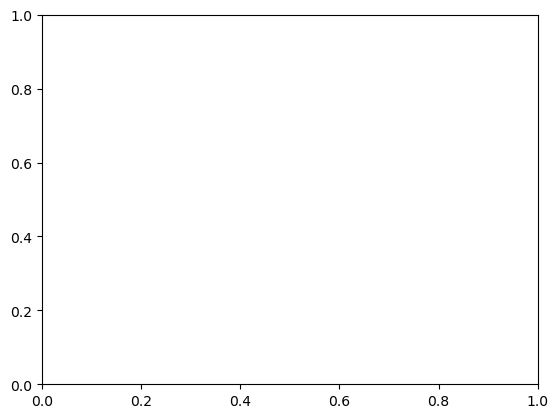

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(350,200,-10),score)
plt.show()

In [16]:
chivalue, pvalues_chi = chi2(X_fsvar, y)

chivalue

pvalues_chi

k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()